In [44]:
## IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [45]:
review = pd.read_csv('review_dataset.csv')
order = pd.read_csv('orders_2016-2020_Dataset.csv')

In [46]:
review = review.dropna(subset=['status'])
review['stars'] = review['stars'].str.replace(' star rating', '')
review['stars'] = pd.to_numeric(review['stars'])
stars = review['stars'].value_counts()

In [47]:
order = order.rename({'Order #' : 'Order Number', 'Tracking #' : 'Tracking Details'},axis = 1)
order['Order Date and Time Stamp'] = pd.to_datetime(order['Order Date and Time Stamp'])
order['month'] = order['Order Date and Time Stamp'].dt.month
order['year'] = order['Order Date and Time Stamp'].dt.year
order['Order Date and Time Stamp']=order['Order Date and Time Stamp'].dt.tz_localize(None)

In [48]:
df1 = order[['Order Number', 'Fulfillment Date and Time Stamp']].dropna()
df1.reset_index(inplace = True)
df2 = review[['status', 'stars']].dropna()
df2.reset_index(inplace = True)
df1 = df1[['Order Number', 'Fulfillment Date and Time Stamp']]
df2 = df2[['status', 'stars']]
reviews_time = df1.join(df2)
reviews_time['Dates'] = pd.to_datetime(reviews_time['Fulfillment Date and Time Stamp']).dt.date
reviews_time['Time'] = pd.to_datetime(reviews_time['Fulfillment Date and Time Stamp']).dt.time
reviews_time['time_hour'] = pd.to_datetime(reviews_time['Fulfillment Date and Time Stamp']).dt.hour
reviews_time['year'] = pd.DatetimeIndex(reviews_time['Dates']).year
reviews_time['month'] = pd.DatetimeIndex(reviews_time['Dates']).month
df3 = reviews_time.groupby(['year', 'month']).agg({'stars': 'mean'})
df3.columns = ['Review_Stars_mean']
df3 = df3.reset_index()
grouped_multiple = df3

In [49]:
order['Billing City']=order['Billing City'].str.upper()
order=order[order['Billing City'].str.contains("TEST|$%^&|GFHGFHJJ|DWWWWWWWW|RGTVRG")==False]
review=review[review['category'].str.contains("Chennai|Mumbai|Bengaluru")==False]
order['Billing City']=order['Billing City'].str.upper()
order=order[order['Billing City'].str.contains("TEST|$%^&|GFHGFHJJ|DWWWWWWWW|RGTVRG")==False]
review=review[review['category'].str.contains("Chennai|Mumbai|Bengaluru")==False]

In [50]:
order['year'].unique()

array([2020, 2019, 2018, 2017, 2016], dtype=int64)

Enter number :  9


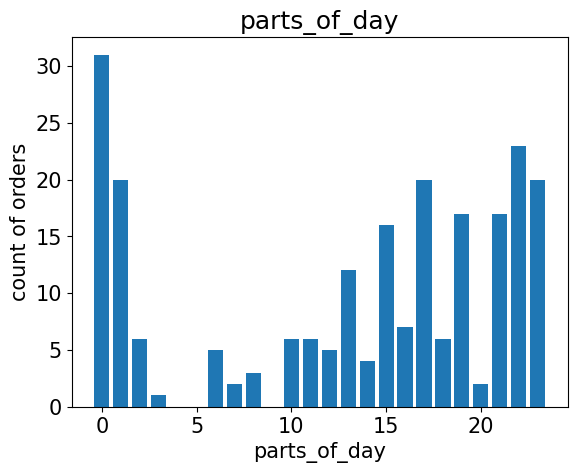

In [55]:
num = int(input('Enter number : '))
if num==1:
    #to see the analysis of Reviews given by Customers
    plt.bar(stars.index, stars.values)
    plt.title('Number of Reviews by Star Rating')
    plt.xlabel('Star Rating')
    plt.ylabel('Number of Reviews')
    plt.savefig("reviews.pdf", format="pdf", bbox_inches="tight")
    # Save the output in an Excel file
    with pd.ExcelWriter('1_reviews.xlsx') as writer:
        review.to_excel(writer, sheet_name='data')
        stars.to_excel(writer, sheet_name='star_counts')
    # Show the plot
    plt.show()
    
elif num==2:
    # to see the analysis of different payment methods used by the Customers
    #plotting
    order['Payment Status'] = order['Payment Status'].map({'Unpaid':'Offline','Paid':'Online','Refunded':'Refund'})
    payment = order['Payment Status'].value_counts()
    plt.bar(payment.index, payment.values)
    plt.title('Payment methods')
    plt.xlabel('type of payment')
    plt.ylabel('count')
    plt.savefig("payment_methods.pdf", format="pdf", bbox_inches="tight")

    # Save the output in an Excel file
    with pd.ExcelWriter('2_payment_methods.xlsx') as writer:
        order.to_excel(writer, sheet_name='data')
        payment.to_excel(writer, sheet_name='payment')


    # Show the plot
    plt.show()
    
elif num==3:
    #  to see the analysis of Top Consumer States of India
    order = order.dropna(subset = ['Billing State'])
    state = order['Billing State'].value_counts()
    state = state.drop(['TX','MA','PE'],axis = 'rows')
    state = state[:10] #Top 10 states

    plt.bar(state.index, state.values)
    plt.title('Best consumer states')
    plt.xlabel('satet name')
    plt.ylabel('count')
    plt.savefig("3_state.pdf", format="pdf", bbox_inches="tight")

    # Save the output in an Excel file
    with pd.ExcelWriter('3_state.xlsx') as writer:
        order.to_excel(writer, sheet_name='data')
        state.to_excel(writer, sheet_name='states')

    # Show the plot
    plt.show()

elif num==4:
    #  to see the analysis of Top Consumer Cities of India
    city = order['Billing City'].value_counts()
    city = city[:10] #Top 10 cities
    plt.figure(figsize=(20,10))
    plt.bar(city.index, city.values)
    plt.title('Best consumer cities')
    plt.xlabel('city name')
    plt.ylabel('count')
    plt.savefig("4_city.pdf", format="pdf", bbox_inches="tight")

    # Save the output in an Excel file
    with pd.ExcelWriter('4_city.xlsx') as writer:
        order.to_excel(writer, sheet_name='data')
        city.to_excel(writer, sheet_name='cities')

    # Show the plot
    plt.show()
    
elif num==5:
    #  to see the analysis of Top Selling Product Categories
    item_category = review['category'].value_counts()
    item_category = item_category[:10]

    plt.figure(figsize=(20,10))
    plt.bar(item_category.index, item_category.values)
    plt.title('Best selling product categories')
    plt.xlabel('product')
    plt.ylabel('count')
    plt.savefig("5_product.pdf",format="pdf",bbox_inches="tight")

    # Save the output in an Excel file
    with pd.ExcelWriter('5_product.xlsx') as writer:
        order.to_excel(writer, sheet_name='data')
        item_category.to_excel(writer, sheet_name='product')
    plt.show()

elif num==6:
    #o see the analysis of Reviews for All Product Categories

    review['stars'] = pd.to_numeric(review['stars'])
    pro_cate = review.groupby(['category']).agg({'stars':'mean'}).reset_index()
    pro_cate = pro_cate.sort_values(by = 'stars',ascending=False)
    plt.figure(figsize=(30,10))
    plt.rcParams.update({'font.size':15})
    plt.bar(pro_cate['category'][:10],pro_cate['stars'][:10],width=0.9)
    plt.title('Top product categories')
    plt.xlabel('product category')
    plt.ylabel('average star rating')
    plt.savefig('6_top_product.pdf',format="pdf",bbox_inches="tight")
    

    # Save the output in an Excel file
    with pd.ExcelWriter('6_top_product.xlsx') as writer:
        review.to_excel(writer, sheet_name='data')
        pro_cate.to_excel(writer, sheet_name='product categories')
    plt.show()

elif num==7:
    #to see the analysis of Number of Orders Per Month Per Year
    month_orders = []
    for i in range(1,13):
      month_name=order.iloc[np.where(order.month== i)].count()
      month_orders.append(month_name.iloc[0])

    year_orders = []
    for i in range(2016,2021):
      year_=order.iloc[np.where(order.year== i)].count()
      year_orders.append(year_.iloc[0])
    yearly = pd.DataFrame(year_orders)
    monthly = pd.DataFrame(month_orders)
    # Save the output in an Excel file
    with pd.ExcelWriter('7_monthly_and_yearly.xlsx') as writer:
        review.to_excel(writer, sheet_name='data')
        
        monthly.to_excel(writer, sheet_name='monthly orders')
        yearly.to_excel(writer,sheet_name='yearly orders')

    # Save the bar chart as a PDF

    with PdfPages('7_monthly_and_yearly.pdf') as pdf:
        fig, ax = plt.subplots()
        ax.bar(names,month_orders)
        ax.set_title('monthly orders')
        ax.set_xlabel('month')
        ax.set_ylabel('number of orders per month')
        fig2, ax = plt.subplots()
        ax.bar(years,year_orders)
        ax.set_title('yearly orders')
        ax.set_xlabel('year')
        ax.set_ylabel('number of orders per year')
        pdf.savefig(fig2)
        pdf.savefig(fig)
        plt.close()
    plt.show()
elif num==8:

    month_review = []
    for i in range(1,13):
      month_name=grouped_multiple.iloc[np.where(grouped_multiple.month== i)].count()
      month_review.append(month_name.iloc[0])

    year_review = []
    for i in range(2016,2021):
      year_=grouped_multiple.iloc[np.where(grouped_multiple.year== i)].count()
      year_review.append(year_.iloc[0])

    names = ['jan','feb','march','april','may','june','july','aug','sep','oct','nov','dec']
    years = ['2016','2017','2018','2019','2020']
    yearly_review = pd.DataFrame(year_review)
    monthly_review = pd.DataFrame(month_review)
    # Save the output in an Excel file
    with pd.ExcelWriter('8_monthly_and_yearly.xlsx') as writer:
        review.to_excel(writer, sheet_name='data')
        
        monthly_review.to_excel(writer, sheet_name='monthly reviews')
        yearly_review.to_excel(writer,sheet_name='yearly reviews')

    # Save the bar chart as a PDF

    with PdfPages('8_monthly_and_yearly.pdf') as pdf:
        fig, ax = plt.subplots()
        ax.bar(names,month_review)
        ax.set_title('monthly reviews')
        ax.set_xlabel('month')
        ax.set_ylabel('number of reviews per month')
        fig2, ax = plt.subplots()
        ax.bar(years,year_review)
        ax.set_title('yearly reviews')
        ax.set_xlabel('year')
        ax.set_ylabel('number of reviews per year')
        pdf.savefig(fig2)
        pdf.savefig(fig)
        plt.close()
    plt.show()
elif num==9:

    parts_of_day = reviews_time['time_hour'].value_counts()

    plt.bar(parts_of_day.index, parts_of_day.values)
    plt.title('parts_of_day')
    plt.xlabel('parts_of_day')
    plt.ylabel('count of orders')
    plt.show()

    # Save the output in an Excel file
    with pd.ExcelWriter('9_orders_for_different_time.xlsx') as writer:
        reviews_time.to_excel(writer, sheet_name='data')
        parts_of_day.to_excel(writer, sheet_name='orders for different times')

    # Save the bar chart as a PDF

    with PdfPages('9_orders_for_different_time.pdf') as pdf:
        fig, ax = plt.subplots()
        ax.bar(parts_of_day.index, parts_of_day.values)
        ax.set_title('orders for different times')
        ax.set_xlabel('parts_of_day')
        ax.set_ylabel('Number of orders')
        pdf.savefig(fig)
        plt.close()

    # Show the plot
    plt.show()


elif num==10:
      stars = review['stars'].value_counts()
      order = order.dropna(subset = ['Billing State'])
      state = order['Billing State'].value_counts()
      order['Payment Status'] = order['Payment Status'].map({'Unpaid':'Offline','Paid':'Online','Refunded':'Refund'})
      payment = order['Payment Status'].value_counts()
      state = state.drop(['TX','MA','PE'],axis = 'rows')
      state = state[:10] #Top 10 states
      city = order['Billing City'].value_counts()
      city = city[:10] #Top 10 cities
      item_category = review['category'].value_counts()
      item_category = item_category[:10]
      pro_cate = review.groupby(['category']).agg({'stars':'mean'}).reset_index()
      pro_cate = pro_cate.sort_values(by = 'stars',ascending=False)
      payment = order['Payment Status'].value_counts()
      month_orders = []
      for i in range(1,13):
        month_name=order.iloc[np.where(order.month== i)].count()
        month_orders.append(month_name.iloc[0])

      year_orders = []
      for i in range(2016,2021):
        year_=order.iloc[np.where(order.year== i)].count()
        year_orders.append(year_.iloc[0])
      yearly = pd.DataFrame(year_orders)
      monthly = pd.DataFrame(month_orders)
      month_review = []
      for i in range(1,13):
        month_name=grouped_multiple.iloc[np.where(grouped_multiple.month== i)].count()
        month_review.append(month_name.iloc[0])

      year_review = []
      for i in range(2016,2021):
        year_=grouped_multiple.iloc[np.where(grouped_multiple.year== i)].count()
        year_review.append(year_.iloc[0])

      names = ['jan','feb','march','april','may','june','july','aug','sep','oct','nov','dec']
      years = ['2016','2017','2018','2019','2020']
      yearly_review = pd.DataFrame(year_review)
      monthly_review = pd.DataFrame(month_review)
      parts_of_day = reviews_time['time_hour'].value_counts()
    
      # Save the output in an Excel file
      with pd.ExcelWriter('Full_report.xlsx') as writer:
        order['Order Date and Time Stamp'] = order['Order Date and Time Stamp'].dt.tz_localize(None)
        review.to_excel(writer, sheet_name='review data')
        stars.to_excel(writer, sheet_name='star_counts')
        order.to_excel(writer, sheet_name='order data')
        payment.to_excel(writer, sheet_name='payment analysis')
        state.to_excel(writer, sheet_name='Top consumer states')
        city.to_excel(writer, sheet_name='Top consumer cities')
        item_category.to_excel(writer, sheet_name='Top products')
        pro_cate.to_excel(writer, sheet_name='product categories')
        monthly.to_excel(writer, sheet_name='monthly orders')
        yearly.to_excel(writer,sheet_name='yearly orders')
        monthly_review.to_excel(writer, sheet_name='monthly reviews')
        yearly_review.to_excel(writer,sheet_name='yearly reviews')
        parts_of_day.to_excel(writer, sheet_name='orders for different times')
      

      # Save the output in pdf file
      with PdfPages('FullReport.pdf') as pdf:
          fig1, ax = plt.subplots()
          ax.bar(stars.index, stars.values)
          ax.set_title('Number of Reviews by Star Rating')
          ax.set_xlabel('Star Rating')
          ax.set_ylabel('Number of Reviews')
          pdf.savefig(fig1)
          fig2, ax = plt.subplots()
          ax.bar(payment.index, payment.values)
          ax.set_title('Payment methods')
          ax.set_xlabel('type of payment')
          ax.set_ylabel('count')
          pdf.savefig(fig2)
          fig3, ax = plt.subplots()
          ax.bar(state.index, state.values)
          ax.set_title('Best consumer state')
          ax.set_xlabel('state name')
          ax.set_ylabel('count')
          pdf.savefig(fig3)
          fig4, ax = plt.subplots()
          ax.bar(state.index, state.values)
          ax.set_title('Best consumer city')
          ax.set_xlabel('city name')
          ax.set_ylabel('count')
          pdf.savefig(fig4)
          fig5, ax = plt.subplots()
          ax.bar(state.index, state.values)
          ax.set_title('Best selling product categories')
          ax.set_xlabel('product name')
          ax.set_ylabel('count')
          pdf.savefig(fig5)
          fig6, ax = plt.subplots()
          ax.bar(pro_cate['category'][:10],pro_cate['stars'][:10])
          ax.set_title('Top product categories')
          ax.set_xlabel('product category')
          ax.set_ylabel('average star rating')
          pdf.savefig(fig6)
 
          fig7, ax = plt.subplots()
          ax.bar(names,month_orders)
          ax.set_title('monthly orders')
          ax.set_xlabel('month')
          ax.set_ylabel('number of orders per month')
          fig8, ax = plt.subplots()
          ax.bar(years,year_orders)
          ax.set_title('yearly orders')
          ax.set_xlabel('year')
          ax.set_ylabel('number of orders per year')
          pdf.savefig(fig7)
          pdf.savefig(fig8)
          fig9, ax = plt.subplots()
          ax.bar(names,month_review)
          ax.set_title('monthly reviews')
          ax.set_xlabel('month')
          ax.set_ylabel('number of reviews per month')
          fig10, ax = plt.subplots()
          ax.bar(years,year_review)
          ax.set_title('yearly reviews')
          ax.set_xlabel('year')
          ax.set_ylabel('number of reviews per year')
          pdf.savefig(fig9)
          pdf.savefig(fig10)
          fig11, ax = plt.subplots()
          ax.bar(parts_of_day.index, parts_of_day.values)
          ax.set_title('orders for different times')
          ax.set_xlabel('parts_of_day')
          ax.set_ylabel('Number of orders')
          pdf.savefig(fig11)
          plt.close()
      plt.show()

else:
  print("Please enter number between 1 to 10 ")
